In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pplt  
import seaborn as sns 

from pandas.plotting import scatter_matrix

In [2]:
salary_dataset  = pd.read_csv(r'C:\Users\SRIKUMAR\Downloads\TCS ION internship\salarydata.csv') # load dataset

salary_dataset.describe() #decribe dataset

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [3]:
salary_dataset.info() #dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.4+ MB


In [4]:
salary_dataset.isnull().sum() #check missing values

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
df = pd.DataFrame(salary_dataset) #create Dataframe from the given dataset

df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
#replacesome special character columns names with proper names 

df.columns #display dataset columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'salary'],
      dtype='object')

In [6]:
df.isin(['?']).sum(axis=0) #Finding the special characters in the data frame

age                  0
workclass         1836
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            583
salary               0
dtype: int64

In [7]:
# replace the special character to nan
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

#dropping the nan columns now 
df.dropna(how='any',inplace=True)

In [8]:
#Finding if special characters are present in the data 
df.isin(['?']).sum(axis=0)

age               0
workclass         0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
country           0
salary            0
dtype: int64

In [9]:
#dropping un-used data from the dataset 
df.drop(['education-num'], axis=1, inplace=True)

In [10]:
# Number of unique categories in SALARY (which is to be predicted)
income = set(df['salary'])
print(income)

df['salary'] = df['salary'].map({'<=50K': 0, '>50K': 1}).astype(int) #mapping the data into numerical data using map function

{'>50K', '<=50K'}


In [11]:
#check the data is replaced 
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [241]:
# unique RACES
race = set(df['race'])
print(race)

#Mapping the values to numerical values 
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

{'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'}


In [242]:
# MARITAL
Marital = set(df['marital'])
print(Marital)

#Mapping the values to numerical values 
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

{'Married-AF-spouse', 'Married-civ-spouse', 'Widowed', 'Separated', 'Never-married', 'Married-spouse-absent', 'Divorced'}


In [243]:
# WORKCLASS
emp = set(df['workclass'])
print(emp)

#Mapping the values to numerical values
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

{'Self-emp-not-inc', 'State-gov', 'Federal-gov', 'Local-gov', 'Private', 'Without-pay', 'Self-emp-inc'}


In [244]:
# EDUCATION
ed = set(df['education'])
print(ed)

#Mapping the values to numerical values
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

{'Prof-school', 'Assoc-acdm', 'Some-college', 'Bachelors', 'Doctorate', '1st-4th', 'HS-grad', '11th', 'Preschool', '9th', '12th', '5th-6th', 'Assoc-voc', '10th', 'Masters', '7th-8th'}


In [245]:
# OCCUPATION
occupation = set(df['occupation'])
print(occupation)

# Now we classify them as numbers instead of their names.
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

{'Armed-Forces', 'Farming-fishing', 'Tech-support', 'Exec-managerial', 'Sales', 'Machine-op-inspct', 'Adm-clerical', 'Handlers-cleaners', 'Protective-serv', 'Transport-moving', 'Craft-repair', 'Prof-specialty', 'Other-service', 'Priv-house-serv'}


In [246]:
# RELATIONSHIP
relationship = set(df['relationship'])
print(relationship)

#Mapping the values to numerical values
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

{'Unmarried', 'Other-relative', 'Own-child', 'Not-in-family', 'Wife', 'Husband'}


In [247]:
df.head(10) #displaying the cleaned data to see if the map as worked

,age,workclass,education,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,salary
0,39,1,12,5,3,0,3,0,2174,0,40,United-States,0
1,50,6,12,2,7,4,3,0,0,0,13,United-States,0
2,38,5,3,4,4,0,3,0,0,0,40,United-States,0
3,53,5,11,2,4,4,0,0,0,0,40,United-States,0
4,28,5,12,2,5,1,0,1,0,0,40,Cuba,0
5,37,5,4,2,7,1,3,1,0,0,40,United-States,0
6,49,5,15,0,13,0,0,1,0,0,16,Jamaica,0
7,52,6,3,2,7,4,3,0,0,0,45,United-States,1
8,31,5,4,5,5,0,3,1,14084,0,50,United-States,1
9,42,5,12,2,7,4,3,0,5178,0,40,United-States,1


<AxesSubplot:xlabel='education'>

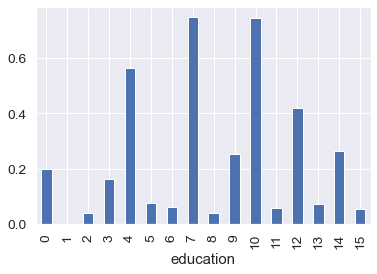

In [248]:
#plotting a bar graph for Education against Salary to see the co-relation between these columns 
df.groupby('education').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

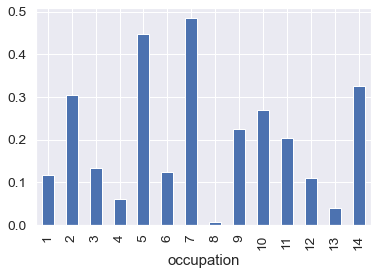

In [249]:
#plotting a bar graph for Occupation against Salary to see the co-relation between these columns 
df.groupby('occupation').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

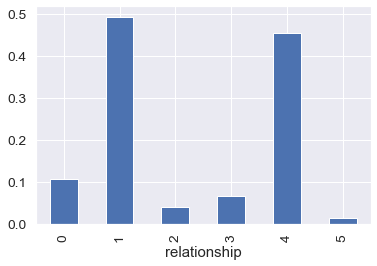

In [250]:
#plotting a bar graph for Relationship against Salary to see the co-relation between these columns 
df.groupby('relationship').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

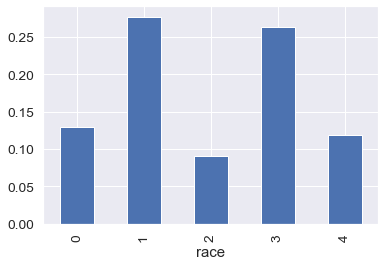

In [251]:
#plotting a bar graph for Race against Salary to see the co-relation between these columns 
df.groupby('race').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

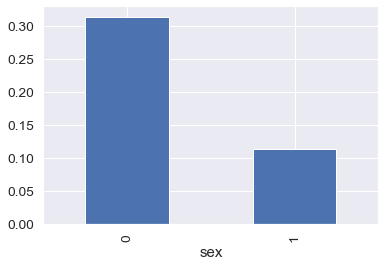

In [252]:
#plotting a bar graph for Race against Salary to see the co-relation between these columns 
df.groupby('sex').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

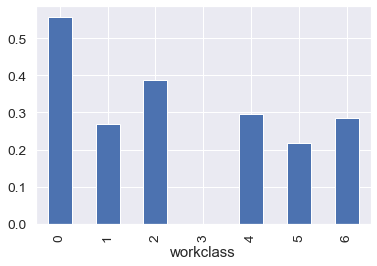

In [253]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('workclass').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='marital'>

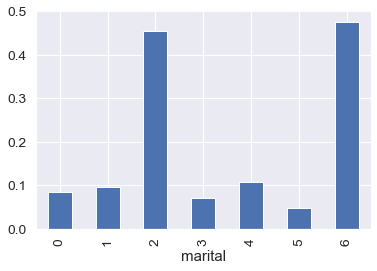

In [254]:
#plotting a bar graph for Race against Salary to see the co-relation between these columns 
df.groupby('marital').salary.mean().plot(kind='bar')

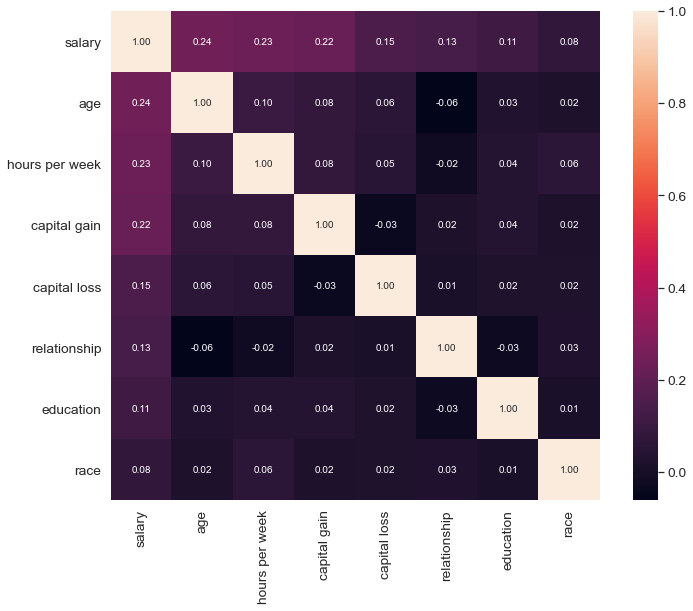

In [255]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'salary')['salary'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

#below we see that there is relation between Relationship, Education, Race, Occupation and Income which is our target 
#columns to predict so, doing more feature analysis on these columns 

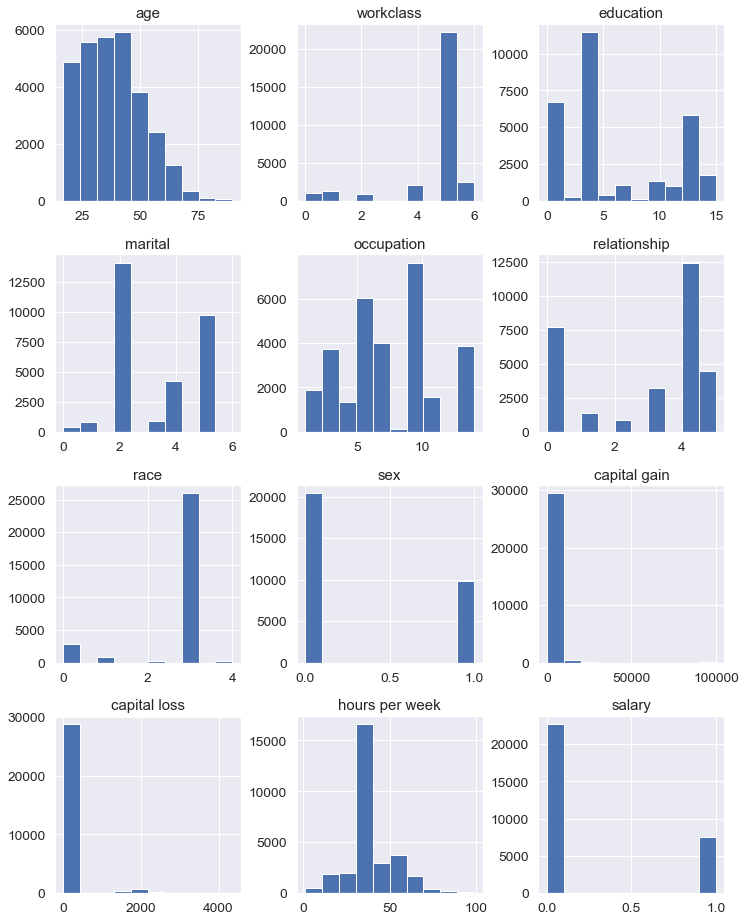

In [260]:
# Plot histogram for each numeric variable/attribute of the dataset

df.hist(figsize=(12,16))
pplt.show()

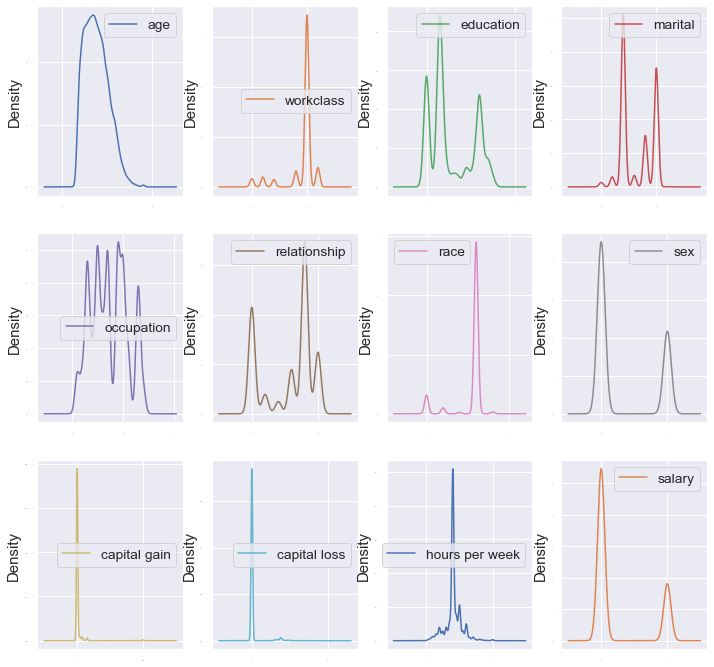

In [261]:
# Density plots

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
pplt.show()

In [262]:
df.columns

Index(['age', 'workclass', 'education', 'marital', 'occupation',
       'relationship', 'race', 'sex', 'capital gain', 'capital loss',
       'hours per week', 'country', 'salary'],
      dtype='object')

In [263]:
#Transform the data set into a data frame 
#NOTE: cleaned_data = the data we want, 
#      X axis = We concatenate the Relationship, Education,Race,Occupation columns using np.c_ provided by the numpy library
#      Y axis = Our target variable or the income of adult i.e Income
df_x = pd.DataFrame(df)
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['sex'],df['marital'],df['workclass']], 
                    columns = ['relationship','education','race','occupation','sex','marital','workclass'])
df_y = pd.DataFrame(df.salary)

In [264]:
# splitting dataset to test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
# Split the data into 67% training and 33% testing data

In [265]:
# MODELS 

# 1. logistics regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred))
print("\nclassification_report :\n", classification_report(y_test,y_pred))
print("\nconfusion_matrix :\n", confusion_matrix(y_test,y_pred))

accuracy is : 0.749146071930882

classification_report :
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      7440
           1       0.51      0.21      0.30      2514

    accuracy                           0.75      9954
   macro avg       0.64      0.57      0.57      9954
weighted avg       0.71      0.75      0.71      9954


confusion_matrix :
 [[6925  515]
 [1982  532]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [266]:
#print our price predictions on our test data
y_pred = reg.predict(x_test)

In [267]:
# Store dataframe values into a numpy array
array = df.values

# Separate array into input and output components by slicing
# For X (input) [:, 0:0] = all the rows, columns from 0 - 13
# Independent variables - input
X = array[:, 0:6]

# For Y (output) [:, 7] = all the rows, columns index 7 (last column)
# Dependent variable = output
Y = array[:,7]

In [268]:
#df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']
reg.predict([[5,11,0,6,0,5,5]])

array([0])

In [269]:
#Predicting the target value that is if income is <=50K then 0 if not 1 with x-axis columns as given below
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [270]:
#Predicting the target value that is if income is <=50K then 0 if not 1 with x-axis columns as given below
reg.predict([[4,12,3,7,0,0,0]])

array([1])

In [271]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print("accuracy is :", accuracy_score(y_test,y_pred))

accuracy is : 0.749146071930882


In [272]:
from sklearn.metrics import classification_report,confusion_matrix
print("\nclassification_report :\n", classification_report(y_test,y_pred))
print("\nconfusion_matrix :\n", confusion_matrix(y_test,y_pred))


classification_report :
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      7440
           1       0.51      0.21      0.30      2514

    accuracy                           0.75      9954
   macro avg       0.64      0.57      0.57      9954
weighted avg       0.71      0.75      0.71      9954


confusion_matrix :
 [[6925  515]
 [1982  532]]


In [273]:
# 2. decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred))
print("\nclassification_report :\n", classification_report(y_test,y_pred))
print("\nconfusion_matrix :\n", confusion_matrix(y_test,y_pred))

accuracy is : 0.8123367490456098

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      7440
           1       0.64      0.57      0.61      2514

    accuracy                           0.81      9954
   macro avg       0.75      0.73      0.74      9954
weighted avg       0.81      0.81      0.81      9954


confusion_matrix :
 [[6643  797]
 [1071 1443]]


In [274]:
# 3. SVM
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred))
print("\nclassification_report :\n", classification_report(y_test,y_pred))
print("\nconfusion_matrix :\n", confusion_matrix(y_test,y_pred))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy is : 0.778681936909785

classification_report :
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      7440
           1       0.64      0.29      0.40      2514

    accuracy                           0.78      9954
   macro avg       0.72      0.62      0.63      9954
weighted avg       0.76      0.78      0.75      9954


confusion_matrix :
 [[7028  412]
 [1791  723]]


In [275]:
# 4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred))
print("\nclassification_report :\n", classification_report(y_test,y_pred))
print("\nconfusion_matrix :\n", confusion_matrix(y_test,y_pred))

<ipython-input-275-76ebde8a5b04>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


accuracy is : 0.816355234076753

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      7440
           1       0.65      0.58      0.61      2514

    accuracy                           0.82      9954
   macro avg       0.76      0.74      0.75      9954
weighted avg       0.81      0.82      0.81      9954


confusion_matrix :
 [[6671  769]
 [1059 1455]]


In [276]:
# 5. KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred))
print("\nclassification_report :\n", classification_report(y_test,y_pred))
print("\nconfusion_matrix :\n", confusion_matrix(y_test,y_pred))

<ipython-input-276-4ec3032de2cf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train,y_train)


accuracy is : 0.803395619851316

classification_report :
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      7440
           1       0.64      0.52      0.57      2514

    accuracy                           0.80      9954
   macro avg       0.74      0.71      0.72      9954
weighted avg       0.79      0.80      0.80      9954


confusion_matrix :
 [[6690  750]
 [1207 1307]]


In [277]:
# 6.Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred))
print("\nclassification_report :\n", classification_report(y_test,y_pred))
print("\nconfusion_matrix :\n", confusion_matrix(y_test,y_pred))

accuracy is : 0.7148884870403858

classification_report :
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      7440
           1       0.46      0.71      0.56      2514

    accuracy                           0.71      9954
   macro avg       0.67      0.71      0.67      9954
weighted avg       0.77      0.71      0.73      9954


confusion_matrix :
 [[5331 2109]
 [ 729 1785]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
